#Στοιχεία ομάδας


###Αριθμός ομάδας: 43 
Datasets: S05, B05

###Μέλη:
Επίθετο | Όνομα | Α.Μ.
---|---|---
Κορακοβούνης|Δημήτριος|03116692
Αναγνωστόπουλος|Θεόδωρος|03116066
||03115087


# Μεγάλο Dataset(Β05) 

Βασικές Πληροφορίες

1. Ο στόχος είναι να προσδιοριστεί κάθε ένας από τους μεγάλους αριθμούς ασπρόμαυρων παραλληλόγραμμων εικονοστοιχείων ως ένα από τα 26 κεφαλαία γράμματα στο αγγλικό αλφάβητο. Οι εικόνες χαρακτήρων βασίστηκαν σε 20 διαφορετικές γραμματοσειρές και κάθε γράμμα μέσα σε αυτές τις 20 γραμματοσειρές παραμορφώθηκε τυχαία για να δημιουργήσει ένα αρχείο 20.000 μοναδικών ερεθισμάτων. Κάθε ερέθισμα μετατράπηκε σε 16 στοιχειώδη αριθμητικά χαρακτηριστικά (στατιστικές στιγμές και μετρήσεις άκρων), τα οποία στη συνέχεια κλιμακώθηκαν για να χωρέσουν σε ένα εύρος ακέραιων τιμών από το 0 έως το 15. Συνήθως εκπαιδεύουμε τα πρώτα 16000 αντικείμενα και στη συνέχεια χρησιμοποιούμε το μοντέλο που προκύπτει για να προβλέψουμε την κατηγορία γραμμάτων για τα υπόλοιπα 4000.

Αρχικά θα φορτώσουμε την βάση

In [ ]:
#Load up-todate libraries

!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package
!pip install --upgrade matplotlib
!pip install -U imbalanced-learn
!pip install matplotlib==3.1.0

     |████████████████████████████████| 1.5MB 5.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 6.8 MB 5.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 14.5 MB 88 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
album

     |████████████████████████████████| 9.5 MB 5.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.4
    Uninstalling pandas-1.1.4:
      Successfully uninstalled pandas-1.1.4


     |████████████████████████████████| 11.6 MB 5.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 167 kB 4.4 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3
     |████████████████████████████████| 13.1 MB 146 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.3
    Uninstalling matplotlib-3.3.3:
      Successfully uninstalled matplotlib-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#clasiifiers Libraries
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns; sns.set()
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [ ]:
#data var contains the dataset. Each column represents a letter. Each row represents a feature

import numpy as np
import pandas


data = pandas.read_csv('letter-recognition.data', header = None).to_numpy() #read csv and convert it to numpy array



print(data)
print(data.shape)

[['T' 2 8 ... 8 0 8]
 ['I' 5 12 ... 8 4 10]
 ['D' 4 11 ... 7 3 9]
 ...
 ['T' 6 9 ... 12 2 4]
 ['S' 2 3 ... 9 5 8]
 ['A' 4 9 ... 7 2 8]]
(20000, 17)


2. Με την κλήση της data.shape μπορούμε να δούμε τις διαστάσεις του πίνακα δεδομένων. Η κάθε σειρά περιέχει ένα γράμμα συγκεκριμένης γραμματοσειράς και παραμόρφωσης, ενώ κάθε στήλη περιέχει τα χαρακτηριστικά του. Τρέχοντας την ετνολή βλέπουμε ότι έχουμε 20000 γράμματα και 16 χαρακτηριστικά για το καθένα. Ότι ακριβώς αναφερόταν και στο UCI. 
Συγκεκριμένα έχουμε τα εξής χαρακτηριστικά:


*   x-box horizontal position of box
*   y-box vertical position of box
*   width width of box
*   high height of box 
*   onpix total # on pixels 
*   x-bar mean x of on pixels in box 
*   y-bar mean y of on pixels in box 
*   x2bar mean x variance 
*   y2bar mean y variance 
*   xybar mean x y correlation 
*   x2ybr mean of x * x * y 
*   xy2br mean of x * y * y
*   x-ege mean edge count left to right 
*   xegvy correlation of x-ege with y 
*   y-ege mean edge count bottom to top 
*   yegvx correlation of y-ege with x 

Τα γράμματα δεν είναι διατεταγμένα με αλφαβητική σειρά





In [ ]:
(rows,columns) = data.shape
print("Number of letters varriations: ",rows)
print("Each letter varriation has: ", columns-1, " features")

Number of letters varriations:  20000
Each letter varriation has:  16  features


3. Στο αρχείο letter-recognition.data που μας δίνεται δεν υπάρχουν ούτε επικεφαλίδες, ούτε αρίθμιση γραμμών.

Ετικέτες των κλάσεων είναι ένα (1) από τα εικοσιέξι (26) γράμματα και βρίσκονται στην πρώτη (1) στήλη.


* Γράμμα -> 1η στήλη
*   x-box horizontal position of box -> 2η στήλη
*   y-box vertical position of box  -> 3η στήλη
*   width width of box  -> 4η στήλη
*   high height of box  -> 5η στήλη
*   onpix total # on pixels -> 6η στήλη
*   x-bar mean x of on pixels in box -> 7η στήλη
*   y-bar mean y of on pixels in box -> 8η στήλη
*   x2bar mean x variance -> 9η στήλη
*   y2bar mean y variance -> 10η στήλη
*   xybar mean x y correlation -> 11η στήλη
*   x2ybr mean of x * x * y -> 12η στήλη
*   xy2br mean of x * y * y -> 13η στήλη
*   x-ege mean edge count left to right  -> 14η στήλη
*   xegvy correlation of x-ege with y -> 15η στήλη
*   y-ege mean edge count bottom to top -> 16η στήλη
*   yegvx correlation of y-ege with x -> 17η στήλη

5. Για να πάρουμε τα δεδομένα στην μορφή που τα έχουμε στην μεταβλητή data δεν χρειάστηκε να κάνουμε κάτι. Χρησιμοποιώντας την έτοιμη συνάρτηση 

```
pandas.read_csv("...").to_numpy()
```
διαβάζουμε το αρχείο όπως χρειάζεται για να μπορουμε να το επεξεργαστούμε.





6. Σύμφωνα με UCI δεν υπάρχουν απουσιάζουσες τιμές. Πραγματοποιούμε έλεγχο

In [ ]:
c = 0 

for i in range(rows):
  for j in range(columns):
    if j == 0:
      continue
    if int(data[i][j])<=0 and int(data[i][j]) >=10:
      c += 1

perc = c/len(data)

print(c)
print(perc)


0
0.0


7.Κάθε χαρακτηριτικό παίρνει τιμές από 0 μέχρι 10. Βρίσκουμε πόσες τιμές έχουμε για κάθε γράμμα.


In [ ]:
Alphabet = {'A':0, 'B':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'I':0,'J':0, 'K':0, 'L':0, 'M':0, 'N':0, 'O':0, 'P':0, 'Q':0, 'R':0, 'S':0,  'T':0, 'U':0, 'V':0, 'W':0, 'X':0, 'Y':0, 'Z':0}

for i in range(rows):
  Alphabet[data[i][0]] += 1

for i in Alphabet:
  print("percentage of value ",i,": ", Alphabet[i]/len(data)*100,'total values: ',Alphabet[i] )
  Alphabet[i] = Alphabet[i]/len(data)*100


#checks if a dataset is balanced
def check_if_balabced(dict):
  flag = True
  for i in dict:
    for j in dict:
      if i == j:
        continue
      if dict[i]/dict[j] >= 1.5:
        flag = False
        break
    if flag == False:
      break
  return flag

if check_if_balabced(Alphabet):
  print("Dataset is BALANCED")
else:
  print("Dataset is UNBALANCED")

percentage of value  A :  3.945 total values:  789
percentage of value  B :  3.83 total values:  766
percentage of value  C :  3.6799999999999997 total values:  736
percentage of value  D :  4.025 total values:  805
percentage of value  E :  3.84 total values:  768
percentage of value  F :  3.875 total values:  775
percentage of value  G :  3.8649999999999998 total values:  773
percentage of value  H :  3.6700000000000004 total values:  734
percentage of value  I :  3.775 total values:  755
percentage of value  J :  3.7350000000000003 total values:  747
percentage of value  K :  3.695 total values:  739
percentage of value  L :  3.805 total values:  761
percentage of value  M :  3.9600000000000004 total values:  792
percentage of value  N :  3.9149999999999996 total values:  783
percentage of value  O :  3.765 total values:  753
percentage of value  P :  4.015 total values:  803
percentage of value  Q :  3.9149999999999996 total values:  783
percentage of value  R :  3.7900000000000005

7. (Συνέχεια)

Από τα παραπάνω αποτελέσματα διαπιστώσαμε ότι το dataset είναι ισορροπημένο.

8. Χωρίζουμε το dataset σε train και test set παίρνοντας τυχαία το 30% των δειγμάτων. 

In [ ]:
from sklearn.model_selection import train_test_split
labels = data[:,0] # pairnoume ta labels, dhladh ta grammata (charachter)
features = data[:,1:] #pairnoume ta xarakthristika (int)

train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state = 42)

## **Classification**

# Baseline classification

Για αυτό το classification θα χρησιμοποιήσουμε τις default τιμές των:


*   dummy
*   Gaussian Naive Bayes
*   kΝΝ
*   Multi-Layer Perceptron (MLP)
*   Support Vector Machines (SVM)





In [ ]:
### KAINOURGIA SYNARTISI

#ekteloume tin ekpaideusi tou taksinomiti kai epistrefoume ta predict kai ton xrono ekpaideusis-pred

import time

def train_cl(classifier, train, train_labels, test, test_labels = None):
  start = time.time()
  classifier.fit(train, train_labels)
  predicted = classifier.predict(test)
  duration = time.time() - start
  return predicted, duration

def print_results(pred,duration):
  confusionMatrix.append(confusion_matrix(test_labels,pred))
  plot_confusion_matrix(confusionMatrix[0],letters)
  tmp_micro = f1_score(test_labels,pred,average='micro')
  tmp_macro = f1_score(test_labels,pred,average='macro')
  f1_micro.append(f1_score(test_labels,pred,average='micro'))
  f1_macro.append(f1_score(test_labels,pred,average='macro'))
  print('F1_micro: ', tmp_micro)
  print('F1_macro: ', tmp_macro)
  print('Precision score: ',precision_score(test_labels, pred, average='micro'))
  print('Recall score: ',recall_score(test_labels, pred, average='micro'))
  print("Accuracy score: ", accuracy_score(test_labels, pred))
  print('Συνολικός Χρόνος: ',duration)




In [ ]:
#plot confusion matrix code


####To confusion matrix mporei na upologistei edw mesa
####Mazi me ta score pou theloume

import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=False):
   
    

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
#arxikopoihsh parametrwn
f1_micro = []
f1_macro = []
confusionMatrix = []
letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

Default Parameters of Dummy:  strategy = stratified, random_state = None


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


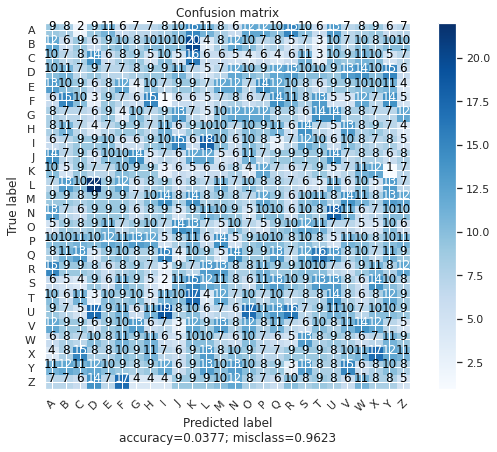

F1_micro:  0.03766666666666667
F1_macro:  0.037461795007147206
Precision score:  0.03766666666666667
Recall score:  0.03766666666666667
Accuracy score:  0.03766666666666667
Συνολικός Χρόνος:  0.017973899841308594


In [ ]:
#Dummy classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Prediction Array
predArray = [] # arxikopoihsh

dummy = DummyClassifier()
print('Default Parameters of Dummy:  strategy = stratified, random_state = None')
(pred, duration) = train_cl(dummy, train,train_labels,test,test_labels)
predArray.append(pred)

print_results(pred,duration)



Deafult Parameters of GNB: var_smoothing = 1e-9


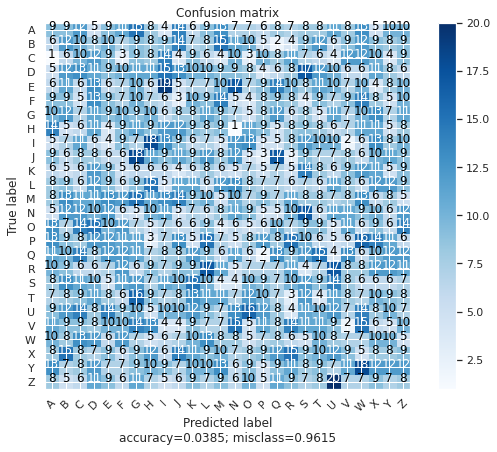

F1_micro:  0.6431666666666667
F1_macro:  0.6379026400734461
Precision score:  0.6431666666666667
Recall score:  0.6431666666666667
Accuracy score:  0.6431666666666667
Συνολικός Χρόνος:  0.0688467025756836


In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
print('Deafult Parameters of GNB: var_smoothing = 1e-9')

(pred, duration) = train_cl(gnb,train,train_labels,test,test_labels)

#Prediction
predArray.append(pred)

print_results(pred,duration)

Deafault Parameters of KNN: n_neighbors = 5, weights = uniform, algorithm = auto, leaf_size = 30, p = 2, metric = minkowski,metric_params = None, n_jobs = None 


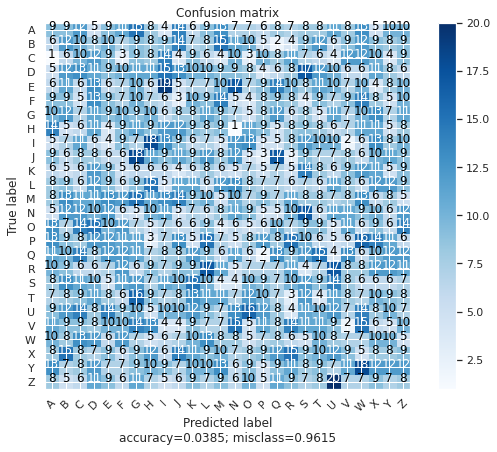

F1_micro:  0.9485
F1_macro:  0.9477366921447768
Precision score:  0.9485
Recall score:  0.9485
Accuracy score:  0.9485
Συνολικός Χρόνος:  1.1786885261535645


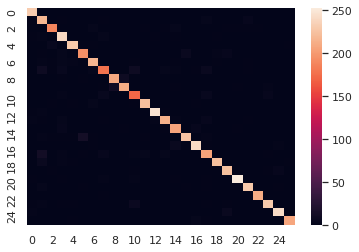

In [ ]:
#kΝΝ
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k = 5 #number of neighbors ( 5 = default)
knn = KNeighborsClassifier()
(pred,duration) = train_cl(knn,train,train_labels,test,test_labels)
print('Deafault Parameters of KNN: n_neighbors = 5, weights = uniform, algorithm = auto, leaf_size = 30, p = 2, metric = minkowski,metric_params = None, n_jobs = None ')

#Prediction
predArray.append(pred)

print_results(pred,duration)

import seaborn as sns; sns.set()
ax = sns.heatmap(confusionMatrix[2])

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Default Parameters of MLP: hidden_layer_sizes = (100,), activation = relu, solver = adam, alpha = 0.0001, learning_rate = constant, max_iter = 200


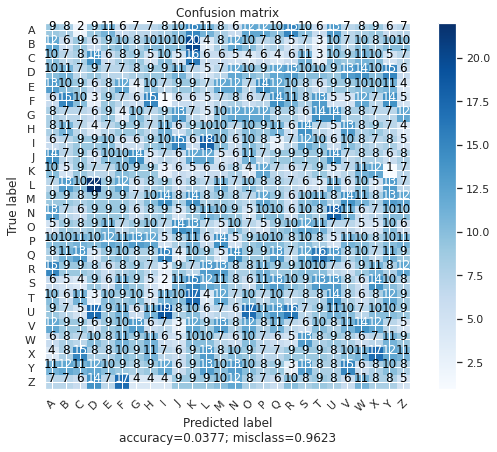

F1_micro:  0.924
F1_macro:  0.9228581299095999
Precision score:  0.924
Recall score:  0.924
Accuracy score:  0.924
Συνολικός Χρόνος:  27.98721981048584


In [ ]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
(pred, duration) = train_cl(mlp,train,train_labels,test,test_labels)
#Prediction
predArray.append(pred)
print('Default Parameters of MLP: hidden_layer_sizes = (100,), activation = relu, solver = adam, alpha = 0.0001, learning_rate = constant, max_iter = 200')

print_results(pred,duration)

Default Parameters of SVC: kernel = rbf, C = 1.0, tol = 1e-3, degree = 3


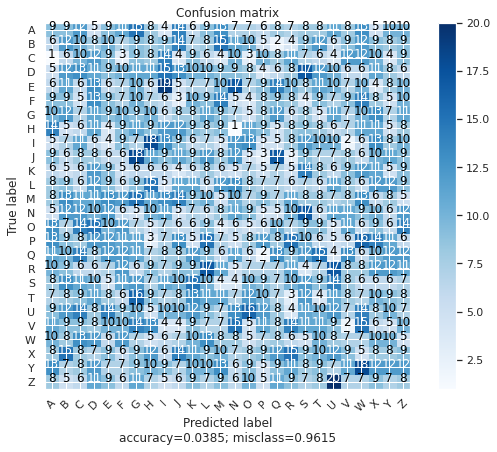

F1_micro:  0.9213333333333333
F1_macro:  0.9203754049511571
Precision score:  0.9213333333333333
Recall score:  0.9213333333333333
Accuracy score:  0.9213333333333333
Συνολικός Χρόνος:  7.220249176025391


In [ ]:
#SVC 
from sklearn.svm import SVC 
model = SVC()
(pred,duration) = train_cl(model,train,train_labels,test,test_labels)
#Prediction
predArray.append(pred)
print('Default Parameters of SVC: kernel = rbf, C = 1.0, tol = 1e-3, degree = 3')

print_results(pred,duration)

[Text(0, 0, 'Dummy'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, '5NN'),
 Text(0, 0, 'MLP'),
 Text(0, 0, 'SVC')]

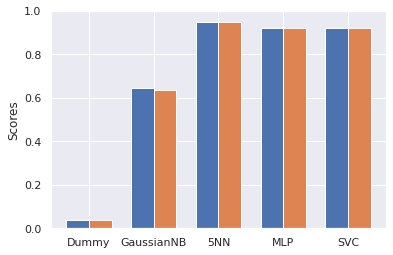

In [ ]:
import matplotlib.pyplot as plt
labels = ['Dummy','GaussianNB','5NN','MLP','SVC']

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, f1_micro, width, label='Micro')
rects2 = ax.bar(x + width/2, f1_macro, width, label='Macro')
ax.set_ylabel('Scores')
ax.set_ylim(top=1)
ax.set_xticks(x)
ax.set_xticklabels(labels)

**Συμπεράσματα**

Από την γραφική παρατηρούμε ότι ο Dummy επιτυγχάνει τα χειρότερα αποτελέσματα. Αυτό είναι αναμενόμενο καθώς δεν έχει καμία τεχνική διάκρισης μεταξύ των διαφορετικών classifications. Ο GNB καθώς δεν λαμβάνει υπ΄ όψιν τις αλληλοεξαρτήσεις μεταξύ των διαφορετικών χαρακτηριστικών, έχει χειρότερα αποτελέσματα από τους ΚΝΝ, MLP και SVC.

# ΒΕΛΤΙΣΤΟΠΟΙΗΣΗ ΤΑΞΙΝΟΜΗΤΩΝ

*Σημείωση έγινε χρήση της παραμέτρους verbose ώστε να μπορούμε να βλέπουμε την πρόοδο κατά την εκτέλεση των classifier.*

In [ ]:
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import time
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
train_variance = train.var(axis=0)
print(train_variance)
print(np.max(train_variance))

[3.63933140816283 10.884758525509824 4.05323991836737 5.1519488520421195
 4.778245301020492 4.100719979591318 5.403563668366803 7.40029991836762
 5.702614280611211 6.1870034234704745 6.846729586734925 4.373672979592225
 5.438454673469525 2.375117857142856 6.573798693877286 2.61387083673475]
10.884758525509824


In [ ]:
#everytime variables
vthreshold = [0, 2.5, 4] 
n_components = range(1,16,4)
selector = VarianceThreshold()
scaler = StandardScaler()
acc_d=[]
f1_micro = []
f1_macro = []
confusionMatrix = []
cv = 5
ros = RandomOverSampler()

<br><br><br><br><br>

In [ ]:
### Function for GridSearch

def best_parameters(steps, param, cv, score_type, train, train_labels, test, test_labels):
  pipe = Pipeline(steps = steps, memory = 'tmp')
  estimator = GridSearchCV(pipe, param, cv = cv, scoring = score_type,verbose=10, n_jobs =-1)
  start_time = time.time()
  estimator.fit(train, train_labels)
  preds = estimator.predict(test)
  print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
  print(classification_report(test_labels, preds))
  print(estimator.best_estimator_)
  print(estimator.best_params_)
  f1_micro.append(f1_score(test_labels,preds,average='micro'))
  f1_macro.append(f1_score(test_labels,preds,average='macro'))
  plot_confusion_matrix(confusion_matrix(test_labels,preds), letters)
  print("Precision score is ", precision_score(test_labels, preds, average=None))
  print("Recall  score is ", recall_score(test_labels, preds, average=None))
  acc_d.append(accuracy_score(test_labels, preds))
  print("Accuracy score is ", acc_d[-1])



<br><br><br><br><br>

Βελτιστοποίηση Dummy Classifier:

Δοκιμάζουμε για τα παρακάτω strategies:


*   *stratified*
*   *most_frequent*
*   *prior*
*   *uniform*



Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

Συνολικός χρόνος fit και predict: 258.0288257598877 seconds
              precision    recall  f1-score   support

           A       0.04      0.04      0.04       232
           B       0.02      0.02      0.02       229
           C       0.03      0.03      0.03       201
           D       0.06      0.06      0.06       250
           E       0.04      0.04      0.04       238
           F       0.04      0.04      0.04       211
           G       0.06      0.05      0.05       230
           H       0.04      0.04      0.04       218
           I       0.02      0.02      0.02       221
           J       0.03      0.03      0.03       228
           K       0.02      0.03      0.03       188
           L       0.04      0.03      0.04       231
           M       0.05      0.05      0.05       252
           N       0.03      0.03      0.03       231
           O       0.04      0.05      0.05       218
           P       0.03      0.03      0.03       248
           Q       0.

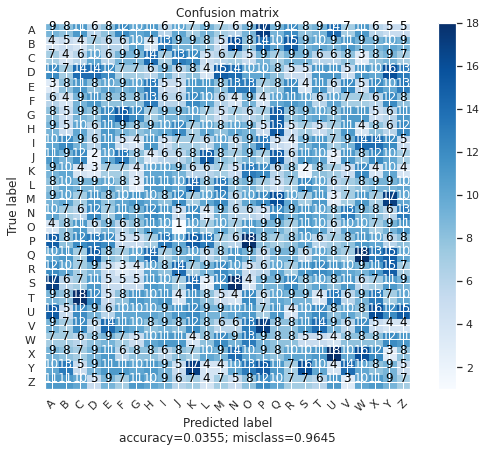

Precision score is  [0.03703704 0.02427184 0.02553191 0.06222222 0.04347826 0.0372093
 0.05714286 0.03529412 0.02192982 0.02816901 0.0234375  0.03960396
 0.05454545 0.02666667 0.04365079 0.03305785 0.03585657 0.03225806
 0.03524229 0.01680672 0.03773585 0.02643172 0.032      0.05020921
 0.036      0.03017241]
Recall  score is  [0.0387931  0.02183406 0.02985075 0.056      0.04201681 0.03791469
 0.05217391 0.0412844  0.02262443 0.02631579 0.03191489 0.03463203
 0.04761905 0.02597403 0.05045872 0.03225806 0.03557312 0.02991453
 0.03404255 0.01724138 0.03065134 0.02531646 0.03755869 0.04897959
 0.03585657 0.03286385]
Accuracy score is  0.0355


In [ ]:
strateg = ['stratified','most_frequent','prior','uniform'] #strategy
pca = PCA()
clf = DummyClassifier()
ros = RandomOverSampler()

grid_params = {
    'selector__threshold': vthreshold, 
    'pca__n_components': n_components, 
    'dummy__strategy': strateg
}

steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', clf)]

best_parameters(steps,grid_params,cv,'f1_micro',train,train_labels,test,test_labels)


In [ ]:
print(f1_micro[-1])
print(f1_macro[-1])

0.0355
0.03538326566785818


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

Συνολικός χρόνος fit και predict: 231.51291394233704 seconds
              precision    recall  f1-score   support

           A       0.04      0.04      0.04       232
           B       0.02      0.03      0.02       229
           C       0.04      0.05      0.05       201
           D       0.04      0.04      0.04       250
           E       0.04      0.04      0.04       238
           F       0.03      0.03      0.03       211
           G       0.05      0.05      0.05       230
           H       0.04      0.04      0.04       218
           I       0.04      0.05      0.04       221
           J       0.05      0.05      0.05       228
           K       0.04      0.05      0.05       188
           L       0.04      0.04      0.04       231
           M       0.02      0.02      0.02       252
           N       0.02      0.02      0.02       231
           O       0.04      0.04      0.04       218
           P       0.04      0.04      0.04       248
           Q       0

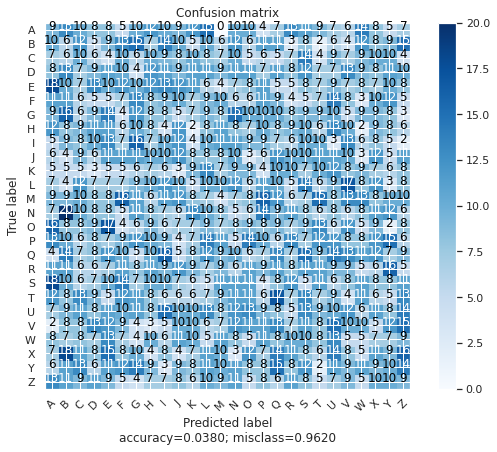

Precision score is  [0.0375     0.02316602 0.04405286 0.04326923 0.03952569 0.03056769
 0.05       0.03571429 0.04273504 0.05381166 0.04368932 0.04098361
 0.01869159 0.02074689 0.04090909 0.04385965 0.0511811  0.03791469
 0.01960784 0.03333333 0.03968254 0.04273504 0.02427184 0.0472103
 0.04484305 0.0387931 ]
Recall  score is  [0.0387931  0.02620087 0.04975124 0.036      0.04201681 0.03317536
 0.05217391 0.03669725 0.04524887 0.05263158 0.04787234 0.04329004
 0.01587302 0.02164502 0.0412844  0.04032258 0.0513834  0.03418803
 0.0212766  0.03017241 0.03831418 0.04219409 0.02347418 0.04489796
 0.03984064 0.04225352]
Accuracy score is  0.038


In [ ]:
pca = PCA()
clf = DummyClassifier()
ros = RandomOverSampler()

grid_params = {
    'selector__threshold': vthreshold,
    'pca__n_components': n_components,
    'dummy__strategy': strateg  
}

steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', clf)]
best_parameters(steps,grid_params,cv,'f1_macro',train,train_labels,test,test_labels)


Βελτιστοποίηση GNB¨

Δοκιμάζουμε var_smoothing για τιμές:


*   *1e-9*
*   *1e-6*
*   *1e-3*



In [ ]:
print(f1_micro[-1])
print(f1_macro[-1])

0.038
0.038011622683725446


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

Συνολικός χρόνος fit και predict: 173.45871543884277 seconds
              precision    recall  f1-score   support

           A       0.85      0.88      0.86       232
           B       0.55      0.78      0.64       229
           C       0.71      0.69      0.70       201
           D       0.73      0.76      0.75       250
           E       0.71      0.56      0.63       238
           F       0.53      0.68      0.59       211
           G       0.53      0.51      0.52       230
           H       0.39      0.29      0.34       218
           I       0.83      0.75      0.79       221
           J       0.79      0.70      0.74       228
           K       0.59      0.59      0.59       188
           L       0.83      0.74      0.78       231
           M       0.85      0.87      0.86       252
           N       0.70      0.54      0.61       231
           O       0.54      0.73      0.62       218
           P       0.80      0.76      0.78       248
           Q       0

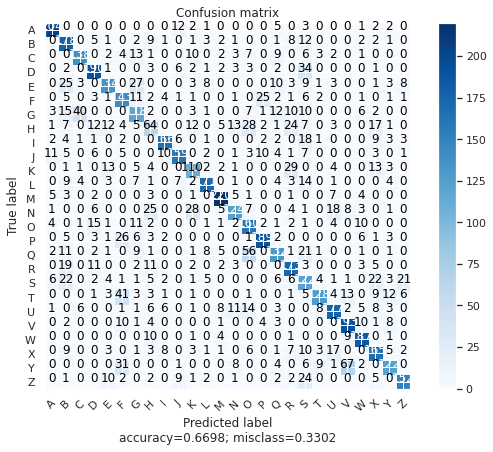

Precision score is  [0.85       0.55108359 0.71134021 0.73359073 0.70526316 0.52962963
 0.52914798 0.3902439  0.83       0.79104478 0.59139785 0.82608696
 0.84615385 0.69662921 0.54421769 0.80425532 0.6407767  0.62454874
 0.38244514 0.8        0.73140496 0.65870307 0.77272727 0.62030075
 0.68926554 0.78350515]
Recall  score is  [0.87931034 0.77729258 0.68656716 0.76       0.56302521 0.67772512
 0.51304348 0.29357798 0.75113122 0.69736842 0.58510638 0.74025974
 0.87301587 0.53679654 0.73394495 0.76209677 0.52173913 0.73931624
 0.51914894 0.55172414 0.67816092 0.81434599 0.87793427 0.67346939
 0.48605578 0.71361502]
Accuracy score is  0.6698333333333333


In [ ]:
smooth = [1e-9,1e-6,1e-3]
pca = PCA()
clf = GaussianNB()
ros = RandomOverSampler()

grid_params = {
    'selector__threshold': vthreshold,
    'pca__n_components': n_components,
    'gnb__var_smoothing': smooth
}

steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)]

best_parameters(steps,grid_params,cv,'f1_micro',train,train_labels,test,test_labels)


In [ ]:
print(f1_micro[-1])
print(f1_macro[-1])

0.6698333333333333
0.6679358382304972


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

Συνολικός χρόνος fit και predict: 170.95280718803406 seconds
              precision    recall  f1-score   support

           A       0.82      0.86      0.84       232
           B       0.53      0.82      0.64       229
           C       0.71      0.70      0.70       201
           D       0.74      0.77      0.76       250
           E       0.74      0.54      0.62       238
           F       0.60      0.71      0.65       211
           G       0.65      0.53      0.59       230
           H       0.42      0.30      0.35       218
           I       0.80      0.74      0.77       221
           J       0.75      0.71      0.73       228
           K       0.48      0.57      0.52       188
           L       0.91      0.72      0.80       231
           M       0.78      0.77      0.77       252
           N       0.71      0.55      0.62       231
           O       0.58      0.78      0.67       218
           P       0.85      0.75      0.80       248
           Q       0

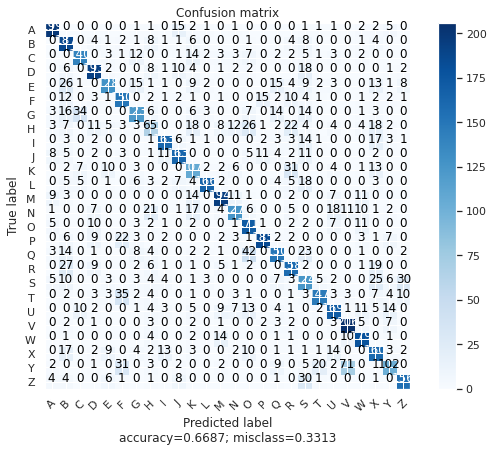

Precision score is  [0.82231405 0.52676056 0.7106599  0.74230769 0.74418605 0.60483871
 0.64736842 0.42207792 0.79901961 0.75462963 0.48198198 0.91208791
 0.77911647 0.70949721 0.57966102 0.85253456 0.66964286 0.60536398
 0.41891892 0.80769231 0.70416667 0.68211921 0.73360656 0.53872054
 0.6375     0.73584906]
Recall  score is  [0.85775862 0.81659389 0.69651741 0.772      0.53781513 0.71090047
 0.53478261 0.29816514 0.73755656 0.71491228 0.56914894 0.71861472
 0.76984127 0.54978355 0.78440367 0.74596774 0.59288538 0.67521368
 0.52765957 0.63362069 0.64750958 0.86919831 0.84037559 0.65306122
 0.4063745  0.73239437]
Accuracy score is  0.6686666666666666


In [ ]:
smooth = [1e-9,1e-6,1e-3]
pca = PCA()
clf = GaussianNB()
ros = RandomOverSampler()

grid_params = {
    'selector__threshold': vthreshold,
    'pca__n_components': n_components,
    'gnb__var_smoothing': smooth
}

steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)]

best_parameters(steps,grid_params,cv,'f1_macro',train,train_labels,test,test_labels)

In [ ]:
print(f1_micro[-1])
print(f1_macro[-1])

0.6686666666666666
0.666339940526992


Βελτιστοποίηση KNN

Δοκιμάζουμε για γείτονες τα:


*   *1*
*   *3*
*   *5*
*   *9*

Για weights:


*   *uniform*
*   *distance*

Τέλος για metric:


*   *euclidean*
*   *manhattan*
*   chebyshev
*   *minkowski*




Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

Συνολικός χρόνος fit και predict: 1933.813196182251 seconds
              precision    recall  f1-score   support

           A       0.97      1.00      0.98       232
           B       0.89      0.93      0.91       229
           C       0.97      0.95      0.96       201
           D       0.91      0.96      0.94       250
           E       0.96      0.93      0.95       238
           F       0.92      0.92      0.92       211
           G       0.96      0.93      0.95       230
           H       0.88      0.82      0.85       218
           I       0.95      0.95      0.95       221
           J       0.95      0.93      0.94       228
           K       0.90      0.91      0.91       188
           L       0.98      0.97      0.98       231
           M       0.98      0.98      0.98       252
           N       0.99      0.94      0.96       231
           O       0.90      0.95      0.93       218
           P       0.97      0.94      0.96       248
           Q       0.

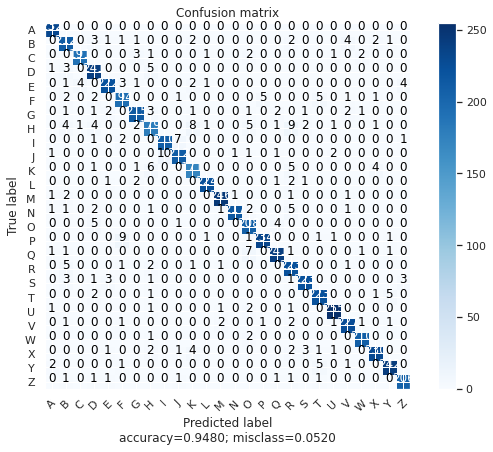

Precision score is  [0.96666667 0.89451477 0.9744898  0.91287879 0.96103896 0.91509434
 0.95555556 0.8817734  0.95454545 0.95067265 0.9047619  0.98245614
 0.98007968 0.99086758 0.9004329  0.975      0.96015936 0.8745098
 0.96956522 0.94491525 0.97328244 0.95378151 0.97674419 0.9623431
 0.96414343 0.96261682]
Recall  score is  [1.         0.92576419 0.95024876 0.964      0.93277311 0.91943128
 0.93478261 0.82110092 0.95022624 0.92982456 0.90957447 0.96969697
 0.97619048 0.93939394 0.95412844 0.94354839 0.95256917 0.95299145
 0.94893617 0.9612069  0.97701149 0.95780591 0.98591549 0.93877551
 0.96414343 0.96713615]
Accuracy score is  0.948


In [ ]:
k = [1, 3, 5, 9]
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1)
ros = RandomOverSampler()
weights = ['uniform','distance']
metric = ['euclidean','manhattan','chebyshev','minkowski']

grid_params = {
    'selector__threshold': vthreshold,
    'pca__n_components': n_components,
    'kNN__n_neighbors': k,
    'kNN__weights': weights,
    'kNN__metric': metric
}

steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)]

best_parameters(steps,grid_params,cv,'f1_micro',train,train_labels,test,test_labels)


In [ ]:
print(f1_micro[-1])
print(f1_macro[-1])

0.948
0.9472410379174871


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

Συνολικός χρόνος fit και predict: 1933.435649394989 seconds
              precision    recall  f1-score   support

           A       0.97      1.00      0.98       232
           B       0.89      0.93      0.91       229
           C       0.97      0.95      0.96       201
           D       0.91      0.96      0.94       250
           E       0.96      0.93      0.95       238
           F       0.92      0.92      0.92       211
           G       0.96      0.93      0.95       230
           H       0.88      0.82      0.85       218
           I       0.95      0.95      0.95       221
           J       0.95      0.93      0.94       228
           K       0.90      0.91      0.91       188
           L       0.98      0.97      0.98       231
           M       0.98      0.98      0.98       252
           N       0.99      0.94      0.96       231
           O       0.90      0.95      0.93       218
           P       0.97      0.94      0.96       248
           Q       0.

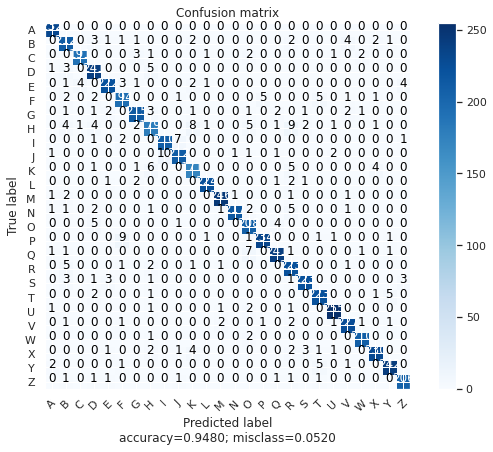

Precision score is  [0.96666667 0.89451477 0.9744898  0.91287879 0.96103896 0.91509434
 0.95555556 0.8817734  0.95454545 0.95067265 0.9047619  0.98245614
 0.98007968 0.99086758 0.9004329  0.975      0.96015936 0.8745098
 0.96956522 0.94491525 0.97328244 0.95378151 0.97674419 0.9623431
 0.96414343 0.96261682]
Recall  score is  [1.         0.92576419 0.95024876 0.964      0.93277311 0.91943128
 0.93478261 0.82110092 0.95022624 0.92982456 0.90957447 0.96969697
 0.97619048 0.93939394 0.95412844 0.94354839 0.95256917 0.95299145
 0.94893617 0.9612069  0.97701149 0.95780591 0.98591549 0.93877551
 0.96414343 0.96713615]
Accuracy score is  0.948


In [ ]:
k = [1, 3, 5, 9]
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1)
ros = RandomOverSampler()
weights = ['uniform','distance']
metric = ['euclidean','manhattan','chebyshev','minkowski']

grid_params = {
    'selector__threshold': vthreshold,
    'pca__n_components': n_components,
    'kNN__n_neighbors': k,
    'kNN__weights': weights,
    'kNN__metric': metric
}

steps=[('selector', selector), ('scaler', scaler),  ('pca', pca), ('kNN', clf)]

best_parameters(steps,grid_params,cv,'f1_macro',train,train_labels,test,test_labels)


In [ ]:
print(f1_micro[-1])
print(f1_macro[-1])

0.948
0.9472410379174871


Βέλτιστο MLP

Δοκιμάζουμε για activation:


*   *relu*
*   *tanh*

Για solver:


*   *adam*
*   *sgd*

Για alpha:


*   *0.0001*
*   *0.03*

Για learning_rate:


*   *constant*
*   *adaptive*

Τέλος για max_iter:


*   *10*
*   *80*




Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

Συνολικός χρόνος fit και predict: 6249.066432476044 seconds
              precision    recall  f1-score   support

           A       0.97      0.99      0.98       232
           B       0.86      0.89      0.87       229
           C       0.94      0.91      0.92       201
           D       0.92      0.91      0.92       250
           E       0.88      0.94      0.91       238
           F       0.90      0.92      0.91       211
           G       0.94      0.91      0.92       230
           H       0.91      0.78      0.84       218
           I       0.94      0.93      0.93       221
           J       0.98      0.90      0.94       228
           K       0.84      0.88      0.86       188
           L       0.94      0.96      0.95       231
           M       0.95      0.94      0.94       252
           N       0.93      0.92      0.93       231
           O       0.91      0.97      0.94       218
           P       0.97      0.92      0.94       248
           Q       0.

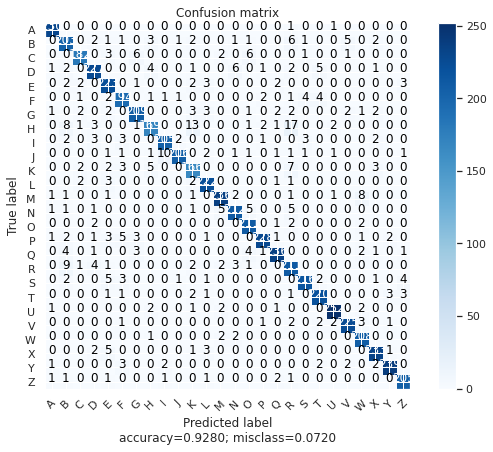

Precision score is  [0.96638655 0.85654008 0.94300518 0.92276423 0.87795276 0.90232558
 0.93721973 0.90860215 0.93607306 0.97630332 0.84263959 0.93670886
 0.94779116 0.9339207  0.91341991 0.96610169 0.9516129  0.80842912
 0.95575221 0.93617021 0.97297297 0.95744681 0.91629956 0.94331984
 0.97154472 0.94470046]
Recall  score is  [0.99137931 0.88646288 0.90547264 0.908      0.93697479 0.91943128
 0.90869565 0.77522936 0.92760181 0.90350877 0.88297872 0.96103896
 0.93650794 0.91774892 0.96788991 0.91935484 0.93280632 0.9017094
 0.91914894 0.94827586 0.96551724 0.94936709 0.97652582 0.95102041
 0.95219124 0.96244131]
Accuracy score is  0.928


In [ ]:

hidden = [(100,)]
activ = ['relu','tanh']
solv = ['sgd', 'adam']
lear = ['constant','adaptive']
alph = [0.0001, 0.003]
max_it = range(10, 100, 70)
pca = PCA()
clf = MLPClassifier()

grid_params ={
    'selector__threshold': vthreshold,
    'pca__n_components': n_components,
    'MLP__hidden_layer_sizes': hidden,
    'MLP__activation': activ,
    'MLP__solver': solv,
    'MLP__max_iter': max_it,
    'MLP__learning_rate': lear,
    'MLP__alpha': alph
}

steps=[('selector', selector), ('scaler', scaler),  ('pca', pca), ('MLP', clf)]

best_parameters(steps,grid_params,cv,'f1_micro',train,train_labels,test,test_labels)


In [ ]:
print(f1_micro[-1])
print(f1_macro[-1])

0.928
0.9269805452045011


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

Συνολικός χρόνος fit και predict: 5667.432574510574 seconds
              precision    recall  f1-score   support

           A       0.96      0.98      0.97       232
           B       0.91      0.88      0.89       229
           C       0.94      0.91      0.92       201
           D       0.93      0.90      0.91       250
           E       0.89      0.96      0.93       238
           F       0.89      0.92      0.91       211
           G       0.92      0.92      0.92       230
           H       0.86      0.81      0.84       218
           I       0.94      0.93      0.93       221
           J       0.97      0.91      0.94       228
           K       0.88      0.85      0.87       188
           L       0.95      0.95      0.95       231
           M       0.97      0.96      0.96       252
           N       0.92      0.94      0.93       231
           O       0.88      0.95      0.92       218
           P       0.98      0.92      0.95       248
           Q       0.

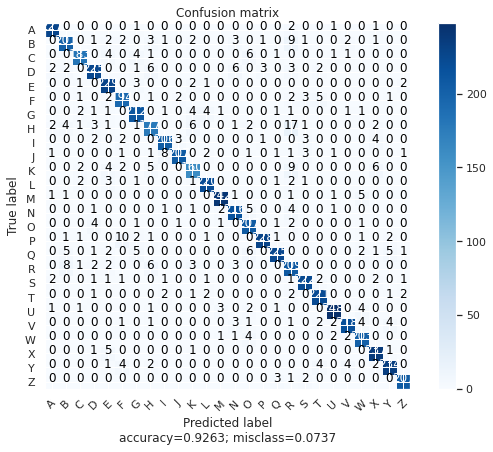

Precision score is  [0.96186441 0.90540541 0.93846154 0.92592593 0.89105058 0.89400922
 0.91774892 0.86341463 0.93636364 0.97183099 0.8839779  0.95238095
 0.968      0.92307692 0.88461538 0.97854077 0.95744681 0.78277154
 0.94067797 0.93644068 0.96498054 0.95614035 0.91855204 0.92578125
 0.94354839 0.96728972]
Recall  score is  [0.97844828 0.87772926 0.91044776 0.9        0.96218487 0.91943128
 0.92173913 0.81192661 0.9321267  0.90789474 0.85106383 0.95238095
 0.96031746 0.93506494 0.94954128 0.91935484 0.88932806 0.89316239
 0.94468085 0.95258621 0.95019157 0.91983122 0.95305164 0.96734694
 0.93227092 0.97183099]
Accuracy score is  0.9263333333333333


In [ ]:
hidden = [(100,)]
activ = ['relu','tanh']
solv = ['sgd', 'adam']
lear = ['constant','adaptive']
alph = [0.0001, 0.003]
max_it = range(10, 100, 70)
pca = PCA()
clf = MLPClassifier()


grid_params ={
    'selector__threshold': vthreshold,
    'pca__n_components': n_components,
    'MLP__hidden_layer_sizes': hidden,
    'MLP__activation': activ,
    'MLP__solver': solv,
    'MLP__max_iter': max_it,
    'MLP__learning_rate': lear,
    'MLP__alpha': alph
}

steps=[('selector', selector), ('scaler', scaler),  ('pca', pca), ('MLP', clf)]

best_parameters(steps,grid_params,cv,'f1_macro',train,train_labels,test,test_labels)


In [ ]:
print(f1_micro[-1])
print(f1_macro[-1])

0.9263333333333333
0.9255529342023852


Βελτισοποίηση LinearSVC

Δοκιμάζουμε για loss:


*   hinge
*   squared_hinge

Για tol:


*   0.1
*   0.01
*   0.001

Για C:


*   1
*   5







Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

Συνολικός χρόνος fit και predict: 4409.4044098854065 seconds
              precision    recall  f1-score   support

           A       0.72      0.87      0.79       232
           B       0.54      0.72      0.62       229
           C       0.56      0.78      0.65       201
           D       0.64      0.77      0.70       250
           E       0.64      0.39      0.49       238
           F       0.75      0.65      0.70       211
           G       0.37      0.22      0.27       230
           H       0.42      0.19      0.26       218
           I       0.85      0.81      0.83       221
           J       0.75      0.74      0.74       228
           K       0.52      0.57      0.54       188
           L       0.80      0.76      0.78       231
           M       0.79      0.90      0.84       252
           N       0.72      0.69      0.70       231
           O       0.73      0.54      0.62       218
           P       0.79      0.83      0.81       248
           Q       0

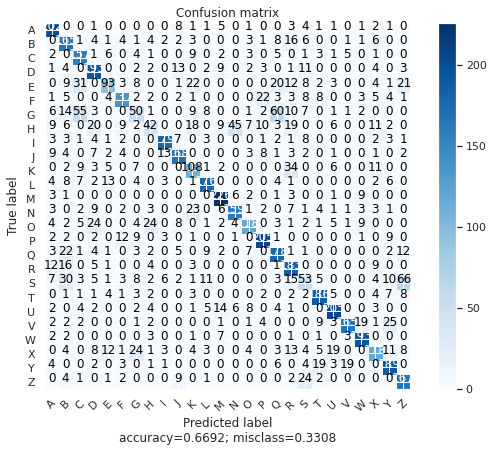

Precision score is  [0.71886121 0.53921569 0.56071429 0.64333333 0.64137931 0.74863388
 0.37313433 0.42       0.85238095 0.74666667 0.51674641 0.79638009
 0.79298246 0.71945701 0.73291925 0.78846154 0.58169935 0.55120482
 0.3630137  0.75609756 0.78544061 0.84183673 0.80082988 0.61780105
 0.69741697 0.57785467]
Recall  score is  [0.87068966 0.72052402 0.78109453 0.772      0.3907563  0.6492891
 0.2173913  0.19266055 0.80995475 0.73684211 0.57446809 0.76190476
 0.8968254  0.68831169 0.5412844  0.8266129  0.70355731 0.78205128
 0.22553191 0.80172414 0.78544061 0.69620253 0.90610329 0.48163265
 0.75298805 0.78403756]
Accuracy score is  0.6691666666666667


In [ ]:
from sklearn.svm import LinearSVC
loSS = ['hinge','squared_hinge']
toL = [0.1, 0.01, 0.001]
CC = [1, 5]
pca = PCA()
clf = LinearSVC()

grid_params = {
    'selector__threshold': vthreshold,
    'pca__n_components': n_components,
    'linearsvc__loss': loSS,
    'linearsvc__tol': toL,
    'linearsvc__C': CC
}

steps=[('selector', selector), ('pca', pca), ('linearsvc', clf)]

best_parameters(steps,grid_params,cv,'f1_micro',train,train_labels,test,test_labels)



In [ ]:
print(f1_micro[-1])
print(f1_macro[-1])

0.6691666666666667
0.6545245780872467


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

Συνολικός χρόνος fit και predict: 2493.169152736664 seconds
              precision    recall  f1-score   support

           A       0.76      0.88      0.82       232
           B       0.54      0.73      0.62       229
           C       0.57      0.78      0.66       201
           D       0.65      0.77      0.70       250
           E       0.70      0.44      0.54       238
           F       0.73      0.67      0.70       211
           G       0.34      0.22      0.27       230
           H       0.40      0.14      0.21       218
           I       0.83      0.80      0.82       221
           J       0.77      0.75      0.76       228
           K       0.52      0.57      0.55       188
           L       0.80      0.76      0.78       231
           M       0.84      0.89      0.86       252
           N       0.67      0.70      0.68       231
           O       0.75      0.55      0.64       218
           P       0.81      0.82      0.81       248
           Q       0.

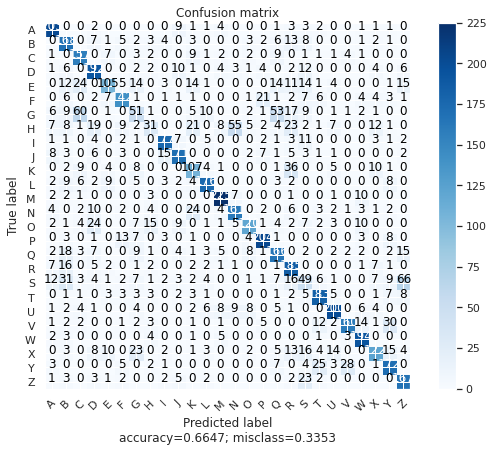

Precision score is  [0.76315789 0.54368932 0.566787   0.64646465 0.69536424 0.73195876
 0.33552632 0.4025974  0.83098592 0.76681614 0.5245098  0.8
 0.83643123 0.66804979 0.75471698 0.80632411 0.57044674 0.53623188
 0.27840909 0.732      0.79365079 0.8040201  0.76984127 0.67403315
 0.6539924  0.58391608]
Recall  score is  [0.875      0.73362445 0.78109453 0.768      0.44117647 0.67298578
 0.22173913 0.14220183 0.80090498 0.75       0.56914894 0.76190476
 0.89285714 0.6969697  0.55045872 0.82258065 0.65612648 0.79059829
 0.20851064 0.7887931  0.76628352 0.67510549 0.91079812 0.49795918
 0.68525896 0.78403756]
Accuracy score is  0.6646666666666666


In [ ]:
from sklearn.svm import LinearSVC
loSS = ['hinge','squared_hinge']
toL = [0.1, 0.01, 0.001]
CC = [1, 5]
pca = PCA()
clf = LinearSVC()

grid_params = {
    'selector__threshold': vthreshold,
    'pca__n_components': n_components,
    'linearsvc__loss': loSS,
    'linearsvc__tol': toL,
    'linearsvc__C': CC
}

steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('linearsvc', clf)]

best_parameters(steps,grid_params,cv,'f1_macro',train,train_labels,test,test_labels)



In [ ]:
print(f1_micro[-1])
print(f1_macro[-1])

0.6646666666666666
0.650800950689612


Βελτιστοποίηση SVC:
Δοκιμάζουμε για kernel:


*   poly
*   rbf

Για degree (μόνο για kernel = poly):


*   1
*   3
*   6

Για loss:


*   hinge
*   squared_hinge

Για tol:


*   0.1
*   0.01
*   0.001

Για C:


*   1
*   5





Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 15

Συνολικός χρόνος fit και predict: 27085.554674625397 seconds
              precision    recall  f1-score   support

           A       0.85      0.95      0.90       232
           B       0.70      0.89      0.78       229
           C       0.93      0.76      0.84       201
           D       0.74      0.91      0.81       250
           E       0.78      0.89      0.83       238
           F       0.78      0.81      0.79       211
           G       0.75      0.79      0.77       230
           H       0.80      0.61      0.69       218
           I       0.95      0.81      0.87       221
           J       0.90      0.78      0.84       228
           K       0.71      0.78      0.74       188
           L       0.95      0.87      0.91       231
           M       0.86      0.94      0.90       252
           N       0.96      0.88      0.92       231
           O       0.78      0.87      0.82       218
           P       0.96      0.80      0.87       248
           Q       0

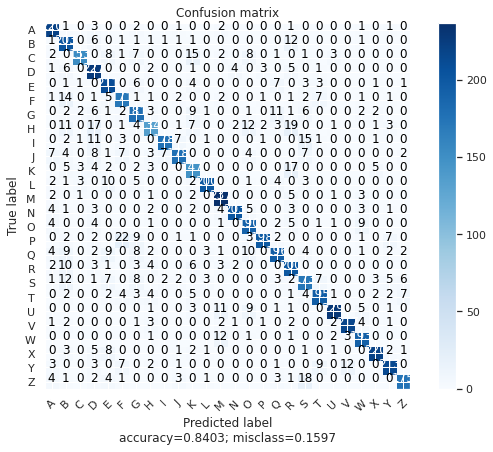

Precision score is  [0.84942085 0.69520548 0.93292683 0.73701299 0.78438662 0.77727273
 0.75103734 0.79761905 0.94680851 0.8989899  0.71014493 0.95238095
 0.85559567 0.95754717 0.77868852 0.96116505 0.83760684 0.72202166
 0.72995781 0.87053571 0.95020747 0.93534483 0.86160714 0.93617021
 0.89121339 0.90206186]
Recall  score is  [0.94827586 0.88646288 0.76119403 0.908      0.88655462 0.81042654
 0.78695652 0.6146789  0.80542986 0.78070175 0.78191489 0.86580087
 0.94047619 0.87878788 0.87155963 0.7983871  0.77470356 0.85470085
 0.73617021 0.84051724 0.87739464 0.91561181 0.90610329 0.89795918
 0.84860558 0.82159624]
Accuracy score is  0.8403333333333334


In [ ]:
ker = ['poly','rbf']
degrEE = [1,3,6]
gammA = [0.0001,  0.005]
toL = [0.1, 0.01, 0.001]
CC = [1, 5]
pca = PCA()
clf = SVC()

grid_params = {
    'selector__threshold': vthreshold,
    'pca__n_components': n_components,
    'svc__kernel':ker,
    'svc__gamma': gammA,
    'svc__tol': toL,
    'svc__C': CC,
    'svc__degree': degrEE
}

steps=[('selector', selector), ('scaler', scaler),  ('pca', pca), ('svc', clf)]

best_parameters(steps,grid_params,cv,'f1_micro',train,train_labels,test,test_labels)



In [ ]:
print(f1_micro[-1])
print(f1_macro[-1])

0.8403333333333334
0.839378732821811


Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 15

Συνολικός χρόνος fit και predict: 26973.35165286064 seconds
              precision    recall  f1-score   support

           A       0.85      0.95      0.90       232
           B       0.70      0.89      0.78       229
           C       0.93      0.76      0.84       201
           D       0.74      0.91      0.81       250
           E       0.78      0.89      0.83       238
           F       0.78      0.81      0.79       211
           G       0.75      0.79      0.77       230
           H       0.80      0.61      0.69       218
           I       0.95      0.81      0.87       221
           J       0.90      0.78      0.84       228
           K       0.71      0.78      0.74       188
           L       0.95      0.87      0.91       231
           M       0.86      0.94      0.90       252
           N       0.96      0.88      0.92       231
           O       0.78      0.87      0.82       218
           P       0.96      0.80      0.87       248
           Q       0.

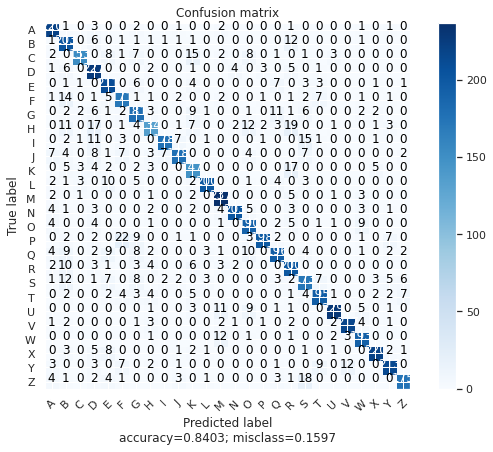

Precision score is  [0.84942085 0.69520548 0.93292683 0.73701299 0.78438662 0.77727273
 0.75103734 0.79761905 0.94680851 0.8989899  0.71014493 0.95238095
 0.85559567 0.95754717 0.77868852 0.96116505 0.83760684 0.72202166
 0.72995781 0.87053571 0.95020747 0.93534483 0.86160714 0.93617021
 0.89121339 0.90206186]
Recall  score is  [0.94827586 0.88646288 0.76119403 0.908      0.88655462 0.81042654
 0.78695652 0.6146789  0.80542986 0.78070175 0.78191489 0.86580087
 0.94047619 0.87878788 0.87155963 0.7983871  0.77470356 0.85470085
 0.73617021 0.84051724 0.87739464 0.91561181 0.90610329 0.89795918
 0.84860558 0.82159624]
Accuracy score is  0.8403333333333334


In [ ]:
ker = ['poly','rbf']
degrEE = [1,3,6]
gammA = [0.0001,  0.005]
toL = [0.1, 0.01, 0.001]
CC = [1, 5]
pca = PCA()
clf = SVC()

grid_params = {
    'selector__threshold': vthreshold,
    'pca__n_components': n_components,
    'svc__kernel':ker,
    'svc__gamma': gammA,
    'svc__tol': toL,
    'svc__C': CC,
    'svc__degree': degrEE
}

steps=[('selector', selector), ('scaler', scaler),  ('pca', pca), ('svc', clf)]

best_parameters(steps,grid_params,cv,'f1_macro',train,train_labels,test,test_labels)



In [ ]:
print(f1_micro[-1])
print(f1_macro[-1])

0.8403333333333334
0.839378732821811


[Text(0, 0, 'DummyMicro'),
 Text(0, 0, 'DummyMacro'),
 Text(0, 0, 'GaussianNBMicro'),
 Text(0, 0, 'GaussianNBMacro'),
 Text(0, 0, '3NNMicro'),
 Text(0, 0, '3NNMacro'),
 Text(0, 0, 'MLPMicro'),
 Text(0, 0, 'MLPMacro'),
 Text(0, 0, 'LinearSVCMicro'),
 Text(0, 0, 'LinearSVCMacro'),
 Text(0, 0, 'Non-LinearSVCMicro'),
 Text(0, 0, 'Non-LinearSVCMacro')]

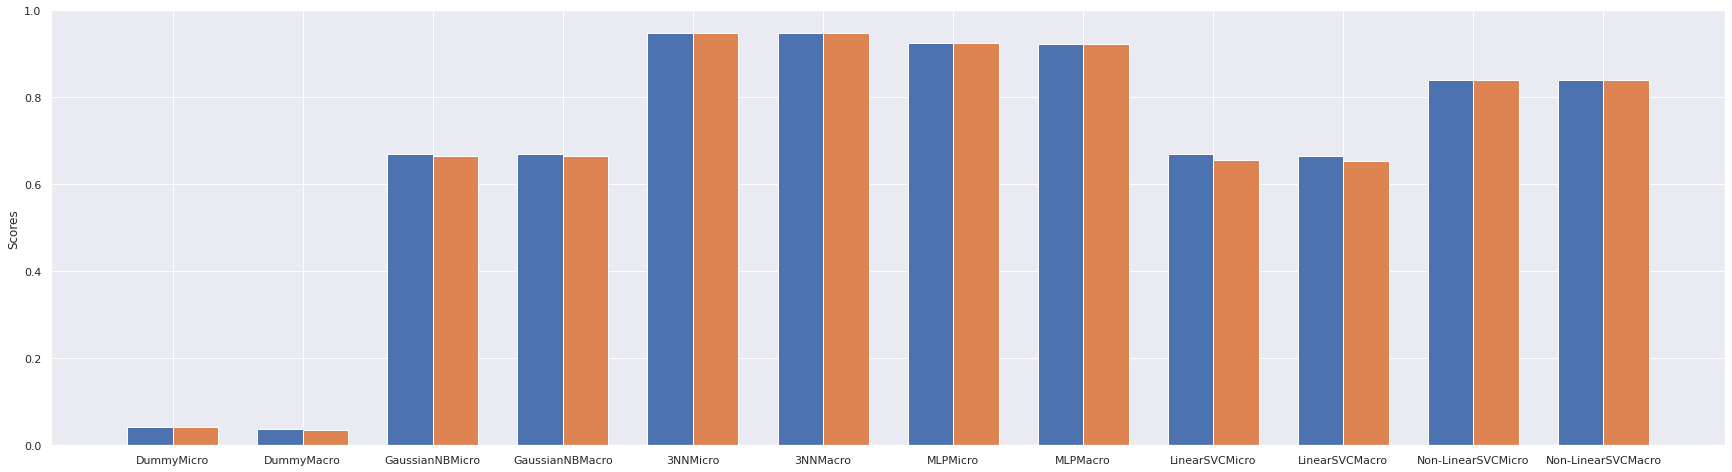

In [ ]:
import matplotlib.pyplot as plt
labels = ['DummyMicro','DummyMacro','GaussianNBMicro','GaussianNBMacro','3NNMicro','3NNMacro','MLPMicro','MLPMacro','LinearSVCMicro','LinearSVCMacro','Non-LinearSVCMicro','Non-LinearSVCMacro']

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(30,8))
rects1 = ax.bar(x - width/2, f1_micro, width, label='Micro')
rects2 = ax.bar(x + width/2, f1_macro, width, label='Macro')
ax.set_ylabel('Scores')
ax.set_ylim(top=1)
ax.set_xticks(x)
ax.set_xticklabels(labels)

**Συμπεράσματα**

Όπως και στο προηγουμένο ερώτημα ο Dummy έχει την χειρότερη επίδοση ακολουθόμενος από τον GNB. Τέλος παρατηρούμε ότι ο Linear Svc έχει χειρότερη απόδοση απο τον Non-Linear.